In [36]:
print('Welcome to California Housing Price Estimation Machine learning Model')

Welcome to California Housing Price Estimation Machine learning Model


In [37]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# The Structure of Machine Learning Project


1.   Look at the big picture
2.   Get the data
3.   Explore and visualize the data for insights
4.   Preprocessing the data
5.   Model selection and training
6.   Fine tune the model
7.   Solution insights
8.   Launch, monitor and maintain the Model

# Look at the Big Picture

The task of this project is to predict the median housing price in any district in the California.

US Census Bureau has published the data for each block (district) in California. The important metrics included in the data for each block are:

* Population
* Median house income
* Median house price
* Households
* Total bedrooms


There are two performance metrics we will address:

* Root mean sqaure error (RMSE)
* Mean absolute error (MSE)





# Get the Data

In [38]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def get_house_data():
  # Check whether the file exist or not
  data_path = Path('datasets/housing/housing.csv')
  if not data_path.exists():
    Path('datasets').mkdir(parents = True, exist_ok = True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, 'datasets/housing.tgz')
    housing_tarball = tarfile.open('datasets/housing.tgz')
    housing_tarball.extractall('datasets')
  
  return pd.read_csv(data_path)

In [39]:
housing = get_house_data()

In [40]:
# Taking a quick peak at the data

# Looking at the first 10 rows
housing.head(10) # remember each row is an instance of a district

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Total attributes and missing values

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* It looks like we have 08 attributes and 01 object; 'oceam_proximity'
* Total value of feature 'total_bedrooms' has some missing values
* 'ocean_proximity' has repetitive values lets look into it.

In [42]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [43]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From the above distribution of data, we can deduce that there exist high variance for most of the feature. To have proper understanding we can plot histograms.

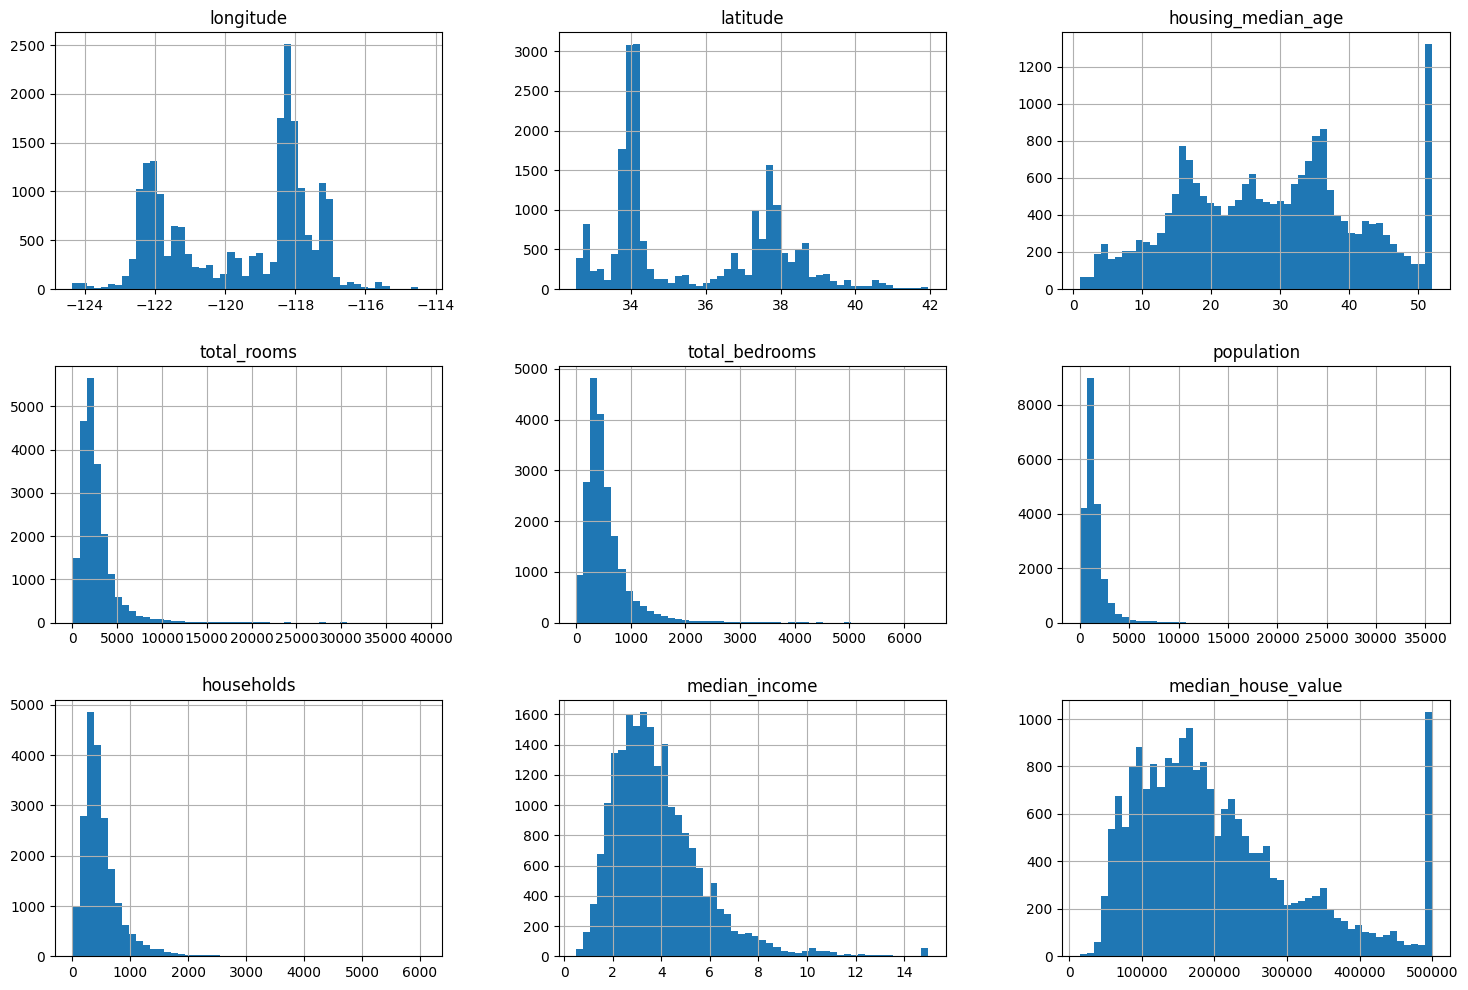

In [44]:
import matplotlib.pyplot as plt

housing.hist(bins = 50, figsize=(18, 12))
plt.show()

From going through the above histograms we can come to following conclusion.
1. The **median_income** has different scale it means, 1 represents actually $10,000.
2. Values for **median_income**, **median_house_value**, **housing_median_age** are capped.
3. All of the values at different scales, that can slow the convergence of out ML model.
4. Most the values are right-tailed or skewed-right, which creates difficulties for ML model to predict.

We need to address these issues before jumping into implementing ML model. But before that! lets split the dataset into training and validation datasets.

Note: For this ML model we will use scikit-learn.

# Create a Test Set

Creating a test datset before jumping into the ML modeling is crucial, the reason for that to avoid **underfitting(bias)** or **overfitting(variance)**. Our goal is to predict the **median_house_value** for unseen data. And if we train our model on all the data, we might be able to reduce the error, but we are not sure either this gives good results for unseen data or not? This is called **data snooping bias**.

Typically **20%** of the dataset is used for test set.

In [45]:
from sklearn.model_selection import train_test_split

To avoid significant sampling bias, stratified sampling is ensured. **median_house_income** can be important attribute thats why it has been used for stratify in the split. If we observe the histogram of **median_house_income** closly we can find the most of the values are clustered betweed 1.5 to 6, but some values go far beyond 6. We should not create too much *strata and each strata should be large enough*. For this case we will create 5 categories.

In [46]:
import numpy as np
# pandas cut() function can be used for this purpose

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3., 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


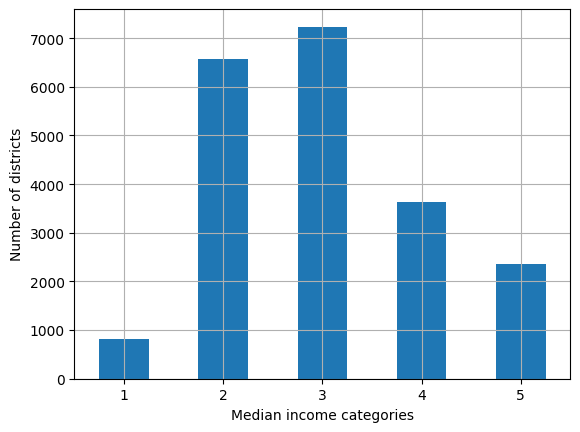

In [47]:

# This will create a bar plot to compare the values between different categories
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Median income categories')
plt.ylabel('Number of districts')
plt.show()

In [48]:
train_set, test_set = train_test_split(housing, test_size=0.2, 
                                       random_state=42)

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, 
                                       stratify=housing['income_cat'], random_state=42)


In [49]:
# Finds the proportion of categories in the datset
def income_cat_proportions(dataset):
    return dataset['income_cat'].value_counts() * 100 / len(dataset)

# DataFrame for comaprison between unstrat and strat datasets
prop_compare = pd.DataFrame({
    'Over all %' : income_cat_proportions(housing),
    'Unstrat train set %' : income_cat_proportions(train_set),
    'Unstrat test set %' : income_cat_proportions(test_set),
    'Strat train set %' : income_cat_proportions(strat_train_set),
    'Strat test set %' : income_cat_proportions(strat_test_set)
})
prop_compare['Unstrat test set error %'] = (prop_compare['Unstrat test set %'] / 
                                    prop_compare['Over all %'] - 1) * 100
prop_compare['Strat test set error %'] = (prop_compare['Strat train set %'] / 
                                    prop_compare['Over all %'] - 1) * 100

prop_compare

,Over all %,Unstrat train set %,Unstrat test set %,Strat train set %,Strat test set %,Unstrat test set error %,Strat test set error %
income_cat,,,,,,,
3,35.058140,35.192587,34.520349,35.059351,35.053295,-1.533997,0.003455
2,31.884690,32.170543,30.741279,31.885901,31.879845,-3.586081,0.003799
4,17.630814,17.435804,18.410853,17.629603,17.635659,4.424292,-0.006870
5,11.443798,11.282703,12.088178,11.446221,11.434109,5.630821,0.021169
1,3.982558,3.918362,4.239341,3.978924,3.997093,6.447689,-0.091241


From the above comparison, we can see how much unstratified split has error in proportion distribution, which eventually effects the results. 

In [50]:
# We do not need income_cat for our ML modelling
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

# Explore and Visualize the Data to Gain Insights

In [51]:
# We will create a copy of our train set to have better insight of the data
housing = strat_train_set.copy()

## Insight to geographical data

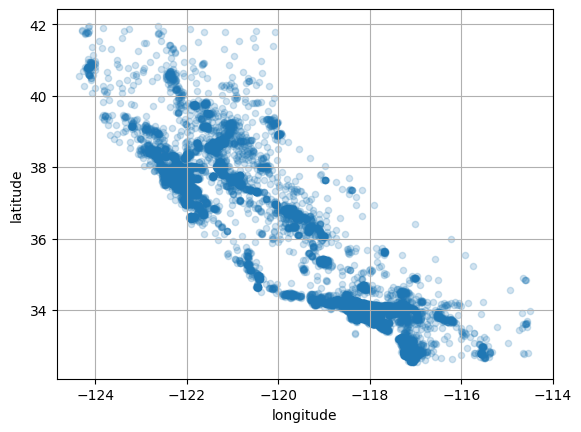

In [52]:
# Setting alpha = 0.2, will darken the areas where the density of districts is high
housing.plot(kind="scatter", x= "longitude", y = "latitude", grid = True,
             alpha = 0.2)
plt.show()

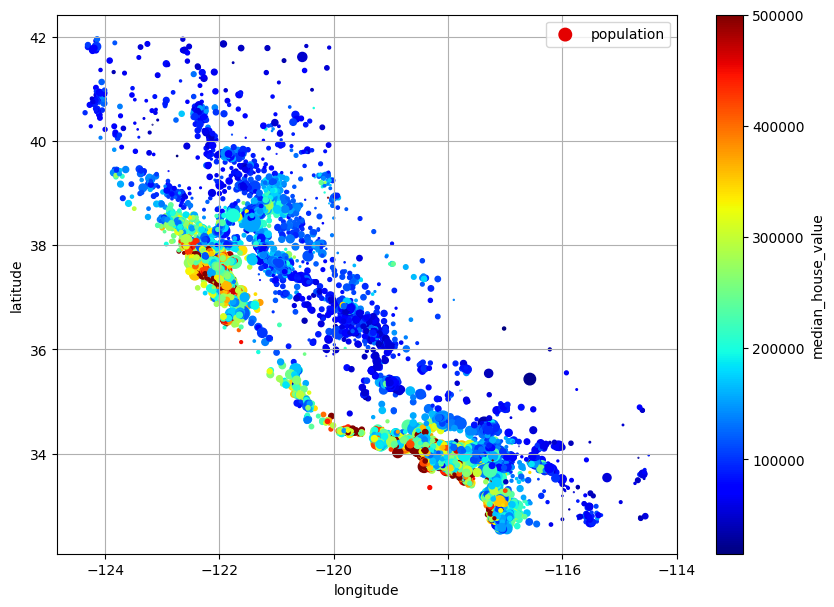

In [53]:
# To plot the median_house_value
# Size = Population of district
# Colour = Median House Price
housing.plot(kind = "scatter", x = "longitude", y = "latitude", 
              grid = True, s = housing['population'] / 100, label = "population",
              c = "median_house_value", cmap = "jet",
              colorbar = True, legend = True, figsize = (10, 7))
plt.show()

From the above nice representation, we can observe the house prices are higher near the ocean. Furthermore, higher population density can also be observerd near the ocean.

## Correlation between features and median_house_value

In [69]:
# For correlation
corr_matrix = housing.select_dtypes(include=["number"]).corr()
corr_matrix['median_house_value'].sort_values(ascending = False)



median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

In [65]:
housing.columns.size

10